# Exploratory data analysis (EDA) for Haberman Dataset

## Haberman Dataset

### Intial Steps
* Load the dataset
* See if the dataset is balanced or not
* Check for any duplicate rows and remove them
* Import the libraries needed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the csv file using pandas
* Check the shape, columns(features available) & Output 

In [3]:
haberman=pd.read_csv("C:/Users/chandraprakash.b/OneDrive - Qentelli/Desktop/Dataset/haberman.csv");
haberman

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [4]:
print(haberman.shape)

(306, 4)


In [5]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [6]:
print(haberman['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


In [7]:
haberman = haberman.drop_duplicates()
print(haberman.shape)

(289, 4)


# Understanding the dataset
* Retrieve the column name and understand the meaning of each column.
* Understand the end goal & check if background knowledge is required.

## Summary of the dataset
* The dataset has data points from a study of survival rate of people who have undergone surgery for breast cancer during 1958-70.
* Age => Age in which a persone undergone surgery.
* Year => The year he/she have undergone a surgery.
* Nodes => Nodes filter fluids into blood streams.The higher the number the more the parts it effects here.
https://www.healthline.com/health/breast-cancer/breast-cancer-lymph-nodes
* Status => Here there are 1,2 status for every recors this means 1 refers to the person who have survival rate more than 5 yrs and 2 refers to the person who have survival rate of less than 5 yrs after surgery.

In [8]:
haberman.head(10) # it gives the result of first 10 rows

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [9]:
haberman["status"].value_counts()
#haberman is an imbalanced dataset as the number of data points for every class is not same.

1    210
2     79
Name: status, dtype: int64

## 2-D Scatter plot

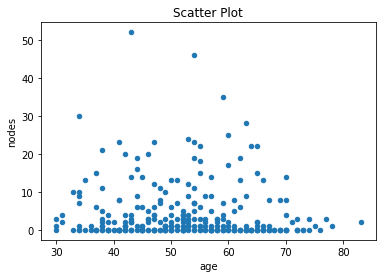

In [10]:
#2-D scatter plot wuth labels :
haberman.plot(kind="scatter",x="age",y="nodes")
plt.title('Scatter Plot')
plt.show()

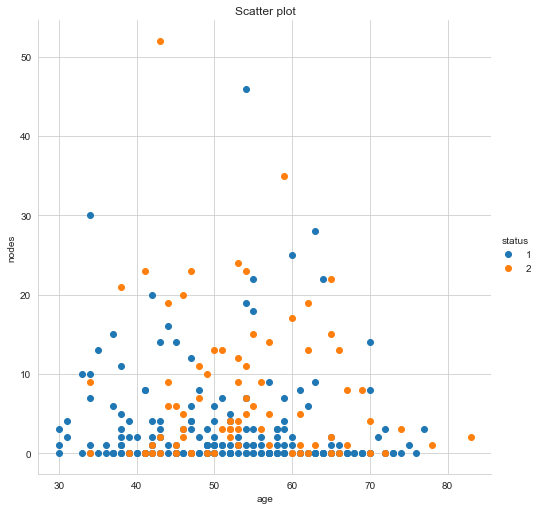

In [13]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue="status",height=7).map(plt.scatter,"age","nodes").add_legend()
plt.title('Scatter plot')
plt.show()

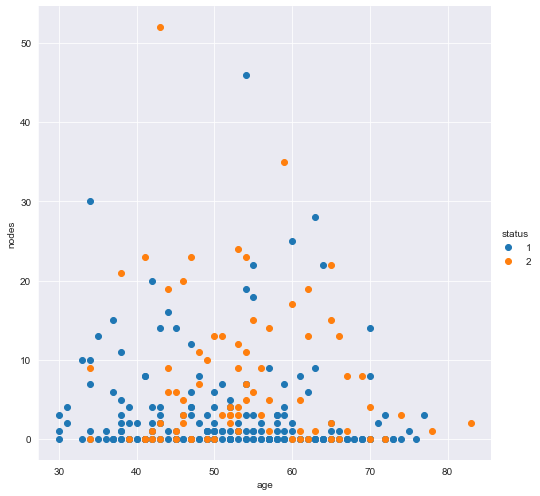

In [71]:
sns.set_style("darkgrid")
sns.FacetGrid(haberman, hue = "status", height = 7)\
.map(plt.scatter, "age", "nodes")\
.add_legend()
plt.show()

## Pair plots

* If there are features less than 5-6 it is better to use pairplots.
* Here we get every feature in plot and with swapping of labels.
* The diagonal plots are similar as they are x & y swapped in between.So, we can take anyone in them

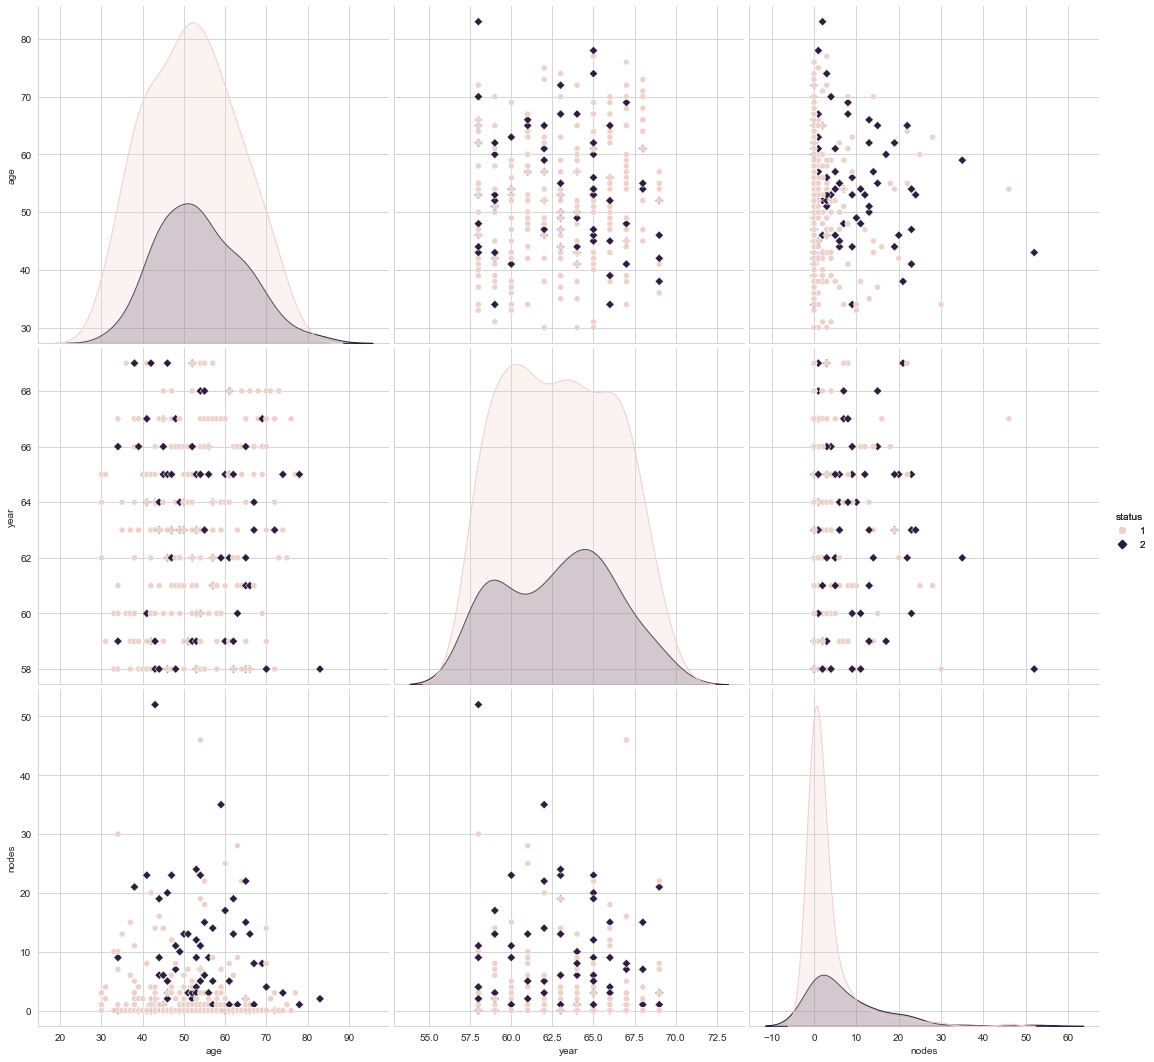

In [16]:
sns.set_style("whitegrid")
sns.pairplot(haberman,hue="status",diag_kind='kde',markers=["o", "D"],height=5).add_legend()
plt.show()

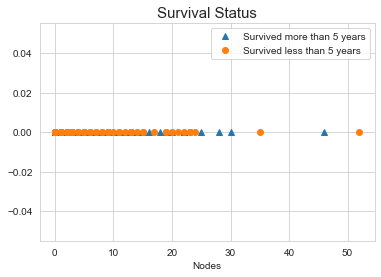

In [23]:
import numpy as np
survival_highrate = haberman.loc[haberman["status"] == 1];
survival_lowrate= haberman.loc[haberman["status"] == 2];
plt.plot(survival_highrate["nodes"], np.zeros_like(survival_highrate['nodes']), '^')
plt.plot(survival_lowrate["nodes"], np.zeros_like(survival_lowrate['nodes']), 'o')
plt.legend(["Survived more than 5 years","Survived less than 5 years"])
plt.xlabel('Nodes')
plt.title('Survival Status',size=15)
plt.show()

* The status we see here is overlapped we can't check properly.

## Probability Density Function(PDF)

* PDF is a smoothened form of histogram.
* In a histogram we have feature on the x-axis and the count on the y-axis.

C:\Users\chandraprakash.b\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chandraprakash.b\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


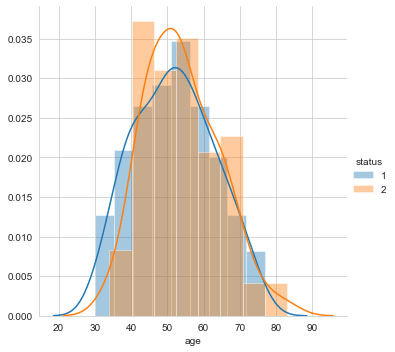

In [28]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

C:\Users\chandraprakash.b\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chandraprakash.b\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


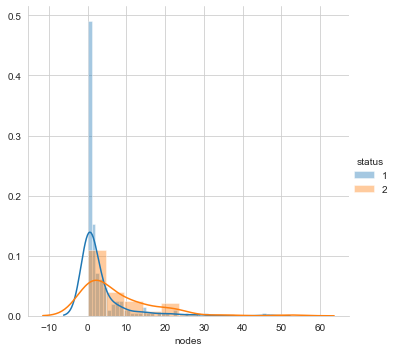

In [29]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

# CDF (Cumulative Density Frequency)

[0.82380952 0.08571429 0.02380952 0.02857143 0.01904762 0.0047619
 0.00952381 0.         0.         0.0047619 ]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


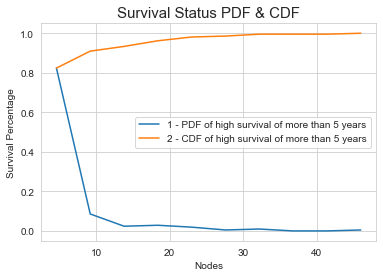

In [26]:
counts, bin_edges = np.histogram(survival_highrate['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.xlabel('Nodes')
plt.ylabel('Survival Percentage')

plt.title('Survival Status PDF & CDF', size = 15)

plt.legend(["1 - PDF of high survival of more than 5 years",\
            "2 - CDF of high survival of more than 5 years"])
plt.show();
# print("=> Here we can see that around 82 % of people with less than 10 nodes have high survival rate.")

[0.56962025 0.15189873 0.12658228 0.05063291 0.07594937 0.
 0.01265823 0.         0.         0.01265823]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


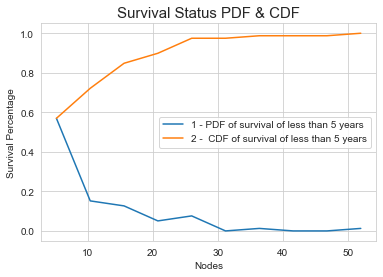

In [27]:
counts1, bin_low = np.histogram(survival_lowrate['nodes'], bins=10, 
                                 density = True)
pdf_low = counts1/(sum(counts1))
print(pdf_low);
print(bin_low);
cdf_low = np.cumsum(pdf_low)
plt.plot(bin_low[1:],pdf_low);
plt.plot(bin_low[1:], cdf_low)
plt.xlabel('Nodes')
plt.ylabel('Survival Percentage')

plt.title('Survival Status PDF & CDF', size = 15)

plt.legend(["1 - PDF of survival of less than 5 years",\
            "2 -  CDF of survival of less than 5 years"])
plt.show();
# print("If the nodes are around 50 there is 100% of survival rate less than 5yrs.")

In [132]:
#Mean, Variance, Std-deviation, 
from statsmodels import robust
print("Means:")
print("For Age")
print("For High survival rate : {} ".format(np.mean(survival_highrate["age"])))
print("For Low survival rate : {} ".format(np.mean(survival_lowrate["age"])))
print("For Year")
print("For High survival rate : {} ".format(np.mean(survival_highrate["year"])))
print("For Low survival rate : {} ".format(np.mean(survival_lowrate["year"])))
print("For Nodes")
print("For High survival rate : {} ".format(np.mean(survival_highrate["nodes"])))
print("For Low survival rate : {} ".format(np.mean(survival_lowrate["nodes"])))


print("\nStd-dev:");
print("For Age")
print("For Age")
print("For High survival rate : {} ".format(np.std(survival_highrate["age"])))
print("For Low survival rate : {} ".format(np.std(survival_lowrate["age"])))
print("For Year")
print("For High survival rate : {} ".format(np.std(survival_highrate["year"])))
print("For Low survival rate : {} ".format(np.std(survival_lowrate["year"])))
print("For Nodes")
print("For High survival rate : {} ".format(np.std(survival_highrate["nodes"])))
print("For Low survival rate : {} ".format(np.std(survival_lowrate["nodes"])))

print("\nMedian:");
print("For Age")
print("For Age")
print("For High survival rate : {} ".format(np.median(survival_highrate["age"])))
print("For Low survival rate : {} ".format(np.median(survival_lowrate["age"])))
print("For Year")
print("For High survival rate : {} ".format(np.median(survival_highrate["year"])))
print("For Low survival rate : {} ".format(np.median(survival_lowrate["year"])))
print("For Nodes")
print("For High survival rate : {} ".format(np.median(survival_highrate["nodes"])))
print("For Low survival rate : {} ".format(np.median(survival_lowrate["nodes"])))
print ("\nMedian Absolute Deviation")
print(robust.mad(survival_highrate["nodes"]))
print(robust.mad(survival_lowrate["nodes"]))

Means:
For Age
For High survival rate : 51.871428571428574 
For Low survival rate : 53.88607594936709 
For Year
For High survival rate : 62.91904761904762 
For Low survival rate : 62.87341772151899 
For Nodes
For High survival rate : 2.9857142857142858 
For Low survival rate : 7.506329113924051 

Std-dev:
For Age
For Age
For High survival rate : 11.066794729199204 
For Low survival rate : 10.138268573337252 
For Year
For High survival rate : 3.2525622204244495 
For Low survival rate : 3.3161174820296506 
For Nodes
For High survival rate : 6.015439319291787 
For Low survival rate : 9.196688200997547 

Median:
For Age
For Age
For High survival rate : 52.0 
For Low survival rate : 53.0 
For Year
For High survival rate : 63.0 
For Low survival rate : 63.0 
For Nodes
For High survival rate : 1.0 
For Low survival rate : 4.0 

Median Absolute Deviation
1.482602218505602
5.930408874022408


In [135]:
print("Percentiles of long survival are ",format(np.percentile(survival_highrate.nodes,np.arange(0,100,25))))
print("Percentiles of low survival are ",format(np.percentile(survival_lowrate.nodes,np.arange(0,100,25))))
print("90th & 95th percentile for long survival is",format(np.percentile(survival_highrate.nodes,[90,95])))
print("90th & 95th percentile for low survival is",format(np.percentile(survival_lowrate.nodes,[90,95])))

Percentiles of long survival are  [0. 0. 1. 3.]
Percentiles of low survival are  [ 0.   1.   4.  11.5]
90th & 95th percentile for long survival is [ 8.1  14.55]
90th & 95th percentile for low survival is [20.2 23. ]


# Box Plot & Violin Plot

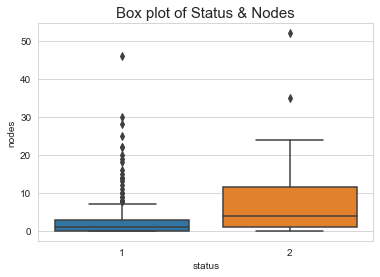

In [138]:
sns.boxplot(x="status",y="nodes",data=haberman)
plt.title('Box plot of Status & Nodes', size = 15)
plt.show()

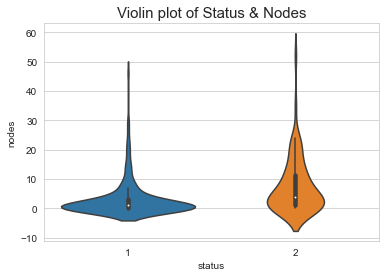

In [17]:
sns.violinplot(x="status",y="nodes",data=haberman)
plt.title('Violin plot of Status & Nodes', size = 15)
plt.show()

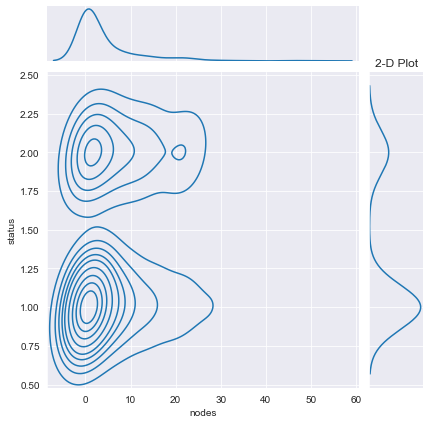

In [13]:
sns.jointplot(x="nodes", y="status", data=haberman, kind="kde");
plt.title("2-D Plot")
plt.show();

<ol><li>It is the representation in 2-D.</li></ol>

# Overall Observations from EDA of Haberman Dataset

## Observations:

### From 2-D Plot

* Here we can see that maximum no.of people have less than 10 nodes.
* And maximum people who have 0 nodes survived long.
* The higher no.of nodes are present in between the age <= 38 to 60

### PDF & CDF
#### Age PDF:
* The minimum age and maximum of persons here are 30 and nearly 83.
* the median is around 53.
* The age between 40-48 and 52-60 have low survival rate or similar in case of less than 5years.

#### Nodes PDF & CDF
* People with (0-3) nodes people have survival rate more than 5 yrs.
* Here we can see that around 82 % of people with less than 10 nodes have high survival rate.
* If the nodes are around 50 there is 100% of survival rate less than 5yrs.

### From Metrics like Mean, Median & Standard Deviation:
* The mean of nodes for high survival rate is less than low survival rate people.
* The data of low survival rate is vast compared to high survival rate.
* The median of nodes for high survival is 1 and low survival is 4.

## Box Plot & Violin Plot

* In the box plot we can see that long survival rate ranges from 0 to 8 and low survival rate is from 0 to 25.
* Whiskers for long survival is from 0 to 7 and low survival is 0 to 25.
* The spread of points in long survival is more near 0 and for low it is near around 2.
* From violin Plot we can clearly see that the whiskers ranges from 0 t0 7 in long and 0 to 25 in low survival rate.